In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

In [2]:
boston = load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(X,columns=boston.feature_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
# standardising the entire data
u = np.mean(X,axis=0)
std = np.std(X,axis=0)

In [10]:
print(u.shape)
print(std.shape)

(13,)
(13,)


In [11]:
X = (X-u)/std

In [12]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [13]:
df = pd.DataFrame(X,columns=boston.feature_names)

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [15]:
one = np.ones((X.shape[0],1))
X = np.hstack((one,X))

In [29]:
X

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [16]:
print(X.shape)
print(y.shape)

(506, 14)
(506,)


In [17]:
def hypothesis(X,theta):
    y_ = np.dot(X,theta)
    return y_

In [18]:
def error(X,y,theta):
    y_ = hypothesis(X,theta)
    return np.sum(((y_ - y)**2))/y.shape[0]

In [19]:
def gradient(X,y,theta):
    grad = np.zeros((X.shape[1],))
    y_ = hypothesis(X,theta)
    grad = np.dot((y_ - y),X)
    return grad/X.shape[0]

In [20]:

def gradient_descent(X,y,lr=0.1,max_epoch=100):
    theta = np.zeros((X.shape[1],))
    error_list = []
    for i in range(max_epoch):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        theta = theta - lr*grad
        
    return error_list,theta

In [21]:
error_list,theta = gradient_descent(X,y)

In [22]:
print(theta)

[22.53220782 -0.78185418  0.81390376 -0.27302486  0.74237969 -1.58190647
  2.88681934 -0.10320657 -2.74824502  1.4628725  -0.88418974 -1.95313341
  0.87190431 -3.64467529]


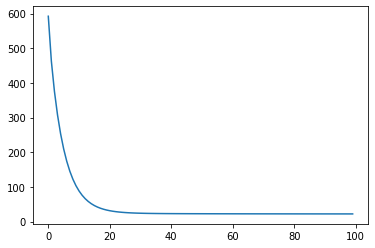

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(error_list)

In [27]:
def r2_score(y_,y):
    num = np.sum((y_ - y)**2)
    den = np.sum((y.mean() - y)**2)
    return (1-(num/den))*100

In [28]:
y_ = hypothesis(X,theta)
r2_score(y_,y)

73.74793148398027